<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Airline_Passengers_Forcasting</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import plotly_express as ps 

import statsmodels.formula.api as smf

#models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt


pd.set_option('display.max_rows', None)
plt.style.use('seaborn-darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})

In [6]:
df = pd.read_csv('AirlinesData.csv')
df

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
5,Jun-95,135
6,Jul-95,148
7,Aug-95,148
8,Sep-95,136
9,Oct-95,119


In [7]:
df.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [8]:
df.shape

(96, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

<AxesSubplot:>

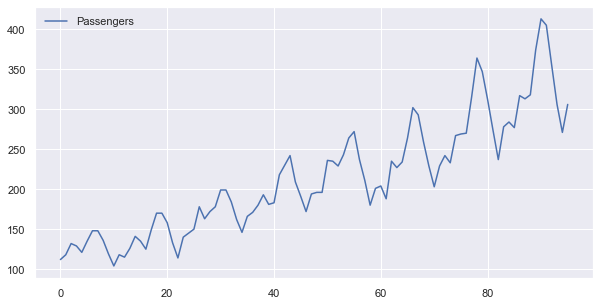

In [11]:
df.plot()

<AxesSubplot:>

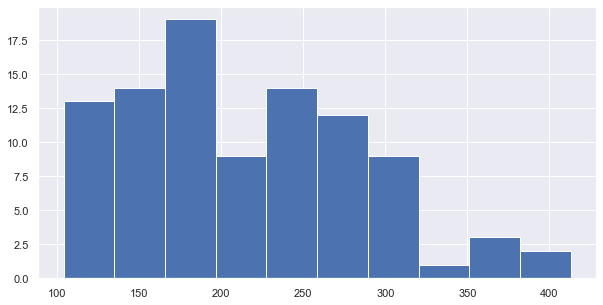

In [13]:
df.Passengers.hist()

In [14]:
df['t'] = [x for x in range(1, df.shape[0]+1)]
df['t_squared'] = [x*x for x in df.t]
df.head()

,Month,Passengers,t,t_squared
0,Jan-95,112,1,1
1,Feb-95,118,2,4
2,Mar-95,132,3,9
3,Apr-95,129,4,16
4,May-95,121,5,25


In [15]:
df['month'] = df.Month.str[:3]
df.head()

,Month,Passengers,t,t_squared,month
0,Jan-95,112,1,1,Jan
1,Feb-95,118,2,4,Feb
2,Mar-95,132,3,9,Mar
3,Apr-95,129,4,16,Apr
4,May-95,121,5,25,May


In [16]:
month = [x[0] for x in df.iloc[0:12, 4:5].values]
month

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [21]:
dummies = pd.get_dummies(df.month, columns=month)
dummies.reindex(columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
for m in df.month:
    df[m] = dummies[m]

df.head()

,Month,Passengers,t,t_squared,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-95,112,1,1,Jan,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,2,4,Feb,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,3,9,Mar,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-95,129,4,16,Apr,0,0,0,1,0,0,0,0,0,0,0,0
4,May-95,121,5,25,May,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
df['year'] = df.Month.str[4:]
df.head()

,Month,Passengers,t,t_squared,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,year
0,Jan-95,112,1,1,Jan,1,0,0,0,0,0,0,0,0,0,0,0,95
1,Feb-95,118,2,4,Feb,0,1,0,0,0,0,0,0,0,0,0,0,95
2,Mar-95,132,3,9,Mar,0,0,1,0,0,0,0,0,0,0,0,0,95
3,Apr-95,129,4,16,Apr,0,0,0,1,0,0,0,0,0,0,0,0,95
4,May-95,121,5,25,May,0,0,0,0,1,0,0,0,0,0,0,0,95


In [46]:
df['log_Passengers'] = np.log(df.Passengers)
df.head()

,Month,Passengers,t,t_squared,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,year,log_sales,log_Passengers
0,Jan-95,112,1,1,Jan,1,0,0,0,0,0,0,0,0,0,0,0,95,4.718499,4.718499
1,Feb-95,118,2,4,Feb,0,1,0,0,0,0,0,0,0,0,0,0,95,4.770685,4.770685
2,Mar-95,132,3,9,Mar,0,0,1,0,0,0,0,0,0,0,0,0,95,4.882802,4.882802
3,Apr-95,129,4,16,Apr,0,0,0,1,0,0,0,0,0,0,0,0,95,4.859812,4.859812
4,May-95,121,5,25,May,0,0,0,0,1,0,0,0,0,0,0,0,95,4.795791,4.795791


### EDA

In [47]:
x = pd.pivot_table(data=df, values='Passengers', index='year', aggfunc='mean',
                  columns = 'month', fill_value = 0)

In [48]:
x

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
00,227,293,229,188,204,302,264,235,234,203,229,259
01,269,347,278,233,242,364,315,267,270,237,274,312
02,313,405,306,277,284,413,374,317,318,271,306,355
95,129,148,118,118,112,148,135,132,121,104,119,136
96,135,170,140,126,115,170,149,141,125,114,133,158
97,163,199,166,150,145,199,178,178,172,146,162,184
98,181,242,194,180,171,230,218,193,183,172,191,209
99,235,272,201,196,196,264,243,236,229,180,211,237


<AxesSubplot:xlabel='year', ylabel='Passengers'>

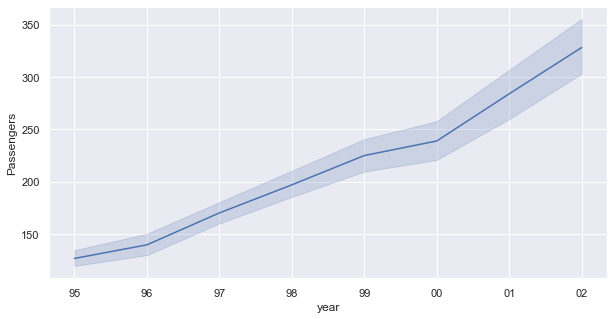

In [49]:
sns.lineplot(x='year', y='Passengers', data=df)

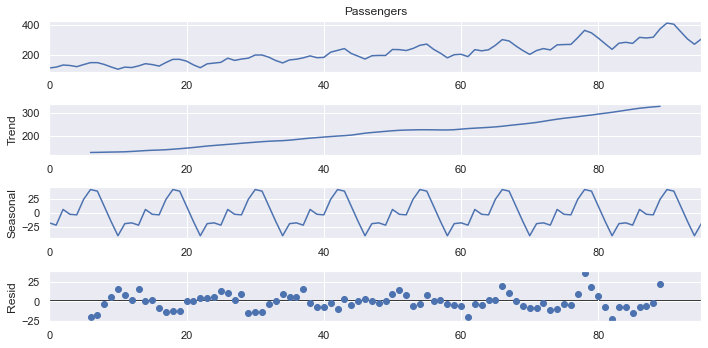

In [50]:
decompose_ts_add = seasonal_decompose(df.Passengers, period=12)
decompose_ts_add.plot()
plt.show()

In [51]:
df.shape

(96, 20)

In [52]:
Train = df.head(76)
Test = df.tail(20)

In [54]:
#Linear Model
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(pred_linear))**2)) 

#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))

#Quadratic 
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))

#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))

#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))

#Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))

#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))

rmse_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(rmse_data)
table_rmse.sort_values(['RMSE_Values'], ascending = True) 

,MODEL,RMSE_Values
5,rmse_Mult_sea,11.784250
6,rmse_Mult_add_sea,11.784250
4,rmse_add_sea_quad,39.759766
1,rmse_Exp,46.621544
0,rmse_linear,57.000148
2,rmse_Quad,58.494275
3,rmse_add_sea,132.254134


### multi_sea has the least rmse hence it is the best suited 

### Final Model

In [56]:
Mul_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = df).fit()
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Passengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     396.6
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           6.90e-68
Time:                        13:37:58   Log-Likelihood:                 164.35
No. Observations:                  96   AIC:                            -302.7
Df Residuals:                      83   BIC:                            -269.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3983      0.009    490.162      0.000       4.380       4.416
t              0.0112      0.000     64.390      0.000       0.011       0.012
Jan            0.2834      0.016     17.818      0.000       0.252       0.315
Feb            0.2827      0.016     17.777      0.000       0.251       0.314
Mar            0.4147      0.016     26.074      0.000       0.383       0.446
Apr            0.3706      0.016     23.300      0.000       0.339       0.402
May            0.3529      0.016     22.180      0.000       0.321       0.385
Jun            0.4655      0.016     29.249      0.000       0.434       0.497
Jul            0.5605      0.016     35.204      0.000       0.529       0.592
Aug            0.5472      0.016     34.347      0.000       0.515       0.579
Sep            0.4257      0.016     26.704      0.000       0.394       0.457
Oct            0.2844      0.016     17.823      0.000       0.253       0.316
Nov            0.1427      0.016      8.935      0.000       0.111       0.174
Dec            0.2680      0.016     16.765      0.000       0.236       0.300
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.075
Skew:                          -0.141   Prob(JB):                        0.584
Kurtosis:                       3.435   Cond. No.                     6.80e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.47e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
df['forcast'] = pd.DataFrame(np.exp(Mul_Add_sea.predict(df)))
df.forcast.head()

0    109.650533
1    111.373746
2    128.670593
3    124.154175
4    123.145318
Name: forcast, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Passengers'>

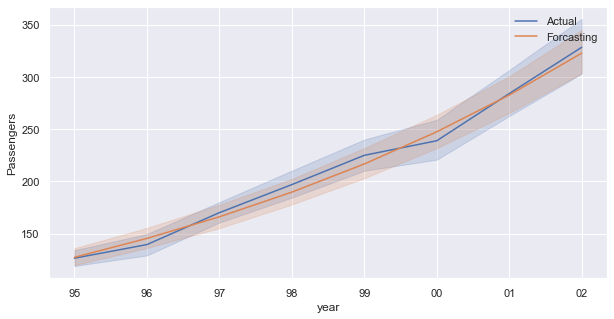

In [59]:
sns.lineplot(x='year', y ='Passengers', data = df, label = 'Actual')
sns.lineplot(x='year', y='forcast', data = df,label = 'Forcasting')